In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator

from scipy.optimize import curve_fit
from tqdm.auto import trange
from tqdm import tqdm
import Metropolis_Algorithm as MA

import importlib

importlib.reload(MA)

# Setting Constants
x_0 = 0
y_0 = 0
t_i = 0
t_f = 8

mass = 1
steps = 150  # Reduced from 800 - fewer points to update
numb_paths = 1000

times = np.linspace(t_i, t_f, steps)
dt = times[1] - times[0]

C:\Users\sebas\AppData\Local\Programs\Python\Python314\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Potential
def x_potential(x):
    return 1 / 2 * x ** 2


def y_potential(x):
    return 1000 * x ** 4


def ho_analytic_pdf(x):
    return (1 / np.sqrt(np.pi)) * np.exp(-x ** 2)


def residual_calculator(x_values, model, model_parameters, y_values, y_errors):
    theoretical_values = model(x_values, *model_parameters)
    residuals = (y_values - theoretical_values) / y_errors
    return residuals

In [3]:
paths_x = np.array([
    MA.Pos_Gen(0.0, 0.0, steps, dt)
    for _ in range(numb_paths)
])

paths_orig = paths_x.copy()

Thermalizing...


Thermalising:  36%|███▋      | 182/500 [00:00<00:00, 988.65it/s] 

Endpoint acceptance ≈ 0.539
Endpoint acceptance ≈ 0.525


Thermalising:  80%|███████▉  | 399/500 [00:00<00:00, 932.77it/s] 

Endpoint acceptance ≈ 0.550
Endpoint acceptance ≈ 0.551


Thermalising: 100%|██████████| 500/500 [00:00<00:00, 993.42it/s] 


Endpoint acceptance ≈ 0.523

Sampling...


Sampling:   2%|▏         | 103/5000 [00:00<00:05, 882.54it/s] 

Endpoint acceptance ≈ 0.507
Endpoint acceptance ≈ 0.534


Sampling:   4%|▍         | 203/5000 [00:00<00:05, 872.53it/s] 

Endpoint acceptance ≈ 0.511


Sampling:   8%|▊         | 405/5000 [00:00<00:05, 891.40it/s] 

Endpoint acceptance ≈ 0.532
Endpoint acceptance ≈ 0.530


Sampling:  10%|█         | 503/5000 [00:00<00:05, 761.49it/s] 

Endpoint acceptance ≈ 0.539


Sampling:  14%|█▍        | 701/5000 [00:00<00:05, 805.98it/s] 

Endpoint acceptance ≈ 0.524
Endpoint acceptance ≈ 0.531


Sampling:  16%|█▌        | 803/5000 [00:00<00:04, 859.87it/s] 

Endpoint acceptance ≈ 0.541


Sampling:  20%|██        | 1002/5000 [00:00<00:05, 761.97it/s]

Endpoint acceptance ≈ 0.493
Endpoint acceptance ≈ 0.535


Sampling:  22%|██▏       | 1108/5000 [00:01<00:04, 917.21it/s] 

Endpoint acceptance ≈ 0.521


Sampling:  26%|██▌       | 1303/5000 [00:01<00:04, 888.15it/s] 

Endpoint acceptance ≈ 0.535
Endpoint acceptance ≈ 0.520


Sampling:  28%|██▊       | 1403/5000 [00:01<00:04, 806.79it/s] 

Endpoint acceptance ≈ 0.545


Sampling:  32%|███▏      | 1597/5000 [00:01<00:03, 1022.85it/s]

Endpoint acceptance ≈ 0.529


Sampling:  34%|███▍      | 1705/5000 [00:01<00:03, 884.45it/s] 

Endpoint acceptance ≈ 0.514
Endpoint acceptance ≈ 0.512


Sampling:  36%|███▌      | 1801/5000 [00:01<00:04, 713.18it/s] 

Endpoint acceptance ≈ 0.507


Sampling:  40%|███▉      | 1995/5000 [00:01<00:02, 1003.47it/s]

Endpoint acceptance ≈ 0.559


Sampling:  42%|████▏     | 2104/5000 [00:02<00:03, 900.23it/s] 

Endpoint acceptance ≈ 0.526
Endpoint acceptance ≈ 0.532


Sampling:  44%|████▍     | 2202/5000 [00:02<00:02, 951.25it/s] 

Endpoint acceptance ≈ 0.512


Sampling:  48%|████▊     | 2402/5000 [00:02<00:03, 830.03it/s] 

Endpoint acceptance ≈ 0.515
Endpoint acceptance ≈ 0.520


Sampling:  50%|█████     | 2501/5000 [00:02<00:03, 715.34it/s] 

Endpoint acceptance ≈ 0.544


Sampling:  54%|█████▍    | 2710/5000 [00:02<00:01, 1169.24it/s]

Endpoint acceptance ≈ 0.527
Endpoint acceptance ≈ 0.548


Sampling:  56%|█████▌    | 2805/5000 [00:02<00:02, 953.83it/s] 

Endpoint acceptance ≈ 0.525


Sampling:  60%|█████▉    | 2997/5000 [00:02<00:01, 1032.37it/s]

Endpoint acceptance ≈ 0.514


Sampling:  62%|██████▏   | 3103/5000 [00:03<00:02, 839.75it/s] 

Endpoint acceptance ≈ 0.526
Endpoint acceptance ≈ 0.549


Sampling:  64%|██████▍   | 3203/5000 [00:03<00:02, 874.60it/s] 

Endpoint acceptance ≈ 0.535


Sampling:  68%|██████▊   | 3400/5000 [00:03<00:01, 1061.61it/s]

Endpoint acceptance ≈ 0.538


Sampling:  70%|███████   | 3501/5000 [00:03<00:01, 783.00it/s] 

Endpoint acceptance ≈ 0.508
Endpoint acceptance ≈ 0.516


Sampling:  72%|███████▏  | 3602/5000 [00:03<00:01, 891.86it/s] 

Endpoint acceptance ≈ 0.526


Sampling:  76%|███████▌  | 3802/5000 [00:03<00:01, 823.53it/s] 

Endpoint acceptance ≈ 0.525
Endpoint acceptance ≈ 0.526


Sampling:  78%|███████▊  | 3905/5000 [00:03<00:01, 940.13it/s] 

Endpoint acceptance ≈ 0.549


Sampling:  82%|████████▏ | 4104/5000 [00:04<00:00, 930.85it/s] 

Endpoint acceptance ≈ 0.529
Endpoint acceptance ≈ 0.528


Sampling:  84%|████████▍ | 4204/5000 [00:04<00:00, 929.50it/s] 

Endpoint acceptance ≈ 0.529


Sampling:  88%|████████▊ | 4402/5000 [00:04<00:00, 769.89it/s] 

Endpoint acceptance ≈ 0.550
Endpoint acceptance ≈ 0.545


Sampling:  94%|█████████▍| 4707/5000 [00:04<00:00, 1028.89it/s]

Endpoint acceptance ≈ 0.499
Endpoint acceptance ≈ 0.549
Endpoint acceptance ≈ 0.525


Sampling: 100%|█████████▉| 4988/5000 [00:04<00:00, 940.56it/s] 

Endpoint acceptance ≈ 0.531
Endpoint acceptance ≈ 0.543


Sampling: 100%|██████████| 5000/5000 [00:04<00:00, 1004.42it/s]



------ Results ------
Numerical PDF area: 1.00000
Analytic PDF area: 1.00000
Standard deviation: 0.7057 (expected ≈ 0.707)
Root mean square: 0.7057 (expected ≈ 0.707)


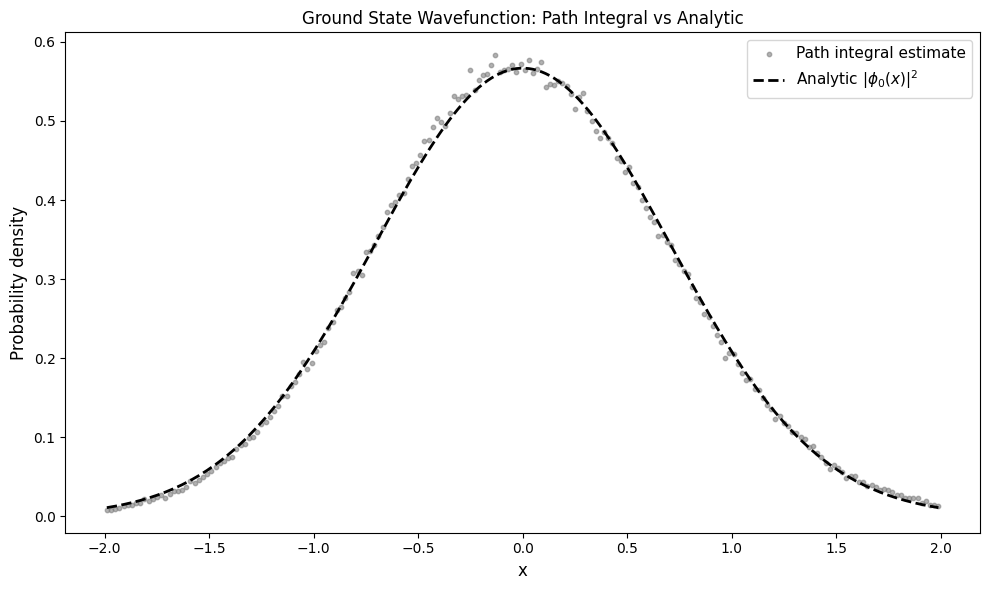

In [4]:
C = 1.8437008005694266
mid = paths_x.shape[1] // 2
thin = 10
sigma_prop = C * np.sqrt(dt)

# Thermalization
print("Thermalizing...")
for sweep in trange(500, desc="Thermalising", mininterval=0):
    acceptances, endpoint_accept = MA.metropolis_sweep_vectorised(
        paths_x, times, mass, x_potential, sigma_prop
    )

    if sweep % 100 == 0:
        tqdm.write(f"Endpoint acceptance ≈ {endpoint_accept:.3f}")

# Sampling
print("\nSampling...")
samples_x = []

for k in trange(5000, desc="Sampling", mininterval=0):
    acceptances, endpoint_accept = MA.metropolis_sweep_vectorised(
        paths_x, times, mass, x_potential, sigma_prop
    )

    if k % 100 == 0:
        tqdm.write(f"Endpoint acceptance ≈ {endpoint_accept:.3f}")

    if k % thin == 0:
        samples_x.append(paths_x[:, -1].copy())

samples_x = np.concatenate(samples_x)

# Compute PDF
x_bins = np.linspace(-2, 2, 201)
pdf_unnormalised_x, bin_edges_x = np.histogram(samples_x, bins=x_bins)

x_centres = 0.5 * (bin_edges_x[1:] + bin_edges_x[:-1])
dx = np.diff(x_bins)[0]

pdf_x = pdf_unnormalised_x / np.sum(pdf_unnormalised_x * dx)

# Analytic PDF
phi_sq_analytic_x = (1 / np.sqrt(np.pi)) * np.exp(-x_centres ** 2)
phi_sq_analytic_x /= np.sum(phi_sq_analytic_x * dx)

# Statistics
mean_square_x = np.mean(samples_x**2)
rms = np.sqrt(mean_square_x)
std = np.std(samples_x)

print("\n------ Results ------")
print(f"Numerical PDF area: {np.sum(pdf_x * dx):.5f}")
print(f"Analytic PDF area: {np.sum(phi_sq_analytic_x * dx):.5f}")
print(f"Standard deviation: {std:.4f} (expected ≈ 0.707)")
print(f"Root mean square: {rms:.4f} (expected ≈ 0.707)")

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(x_centres, pdf_x, label='Path integral estimate', s=10, alpha=0.6, color = 'grey')
plt.plot(x_centres, phi_sq_analytic_x, 'black',linestyle = '--', linewidth=2, label=r'Analytic $|\phi_0(x)|^2$')
plt.xlabel('x', fontsize=12)
plt.ylabel('Probability density', fontsize=12)
plt.legend(fontsize=11)
plt.title('Ground State Wavefunction: Path Integral vs Analytic')

plt.tight_layout()
plt.show()

# Paths Plot

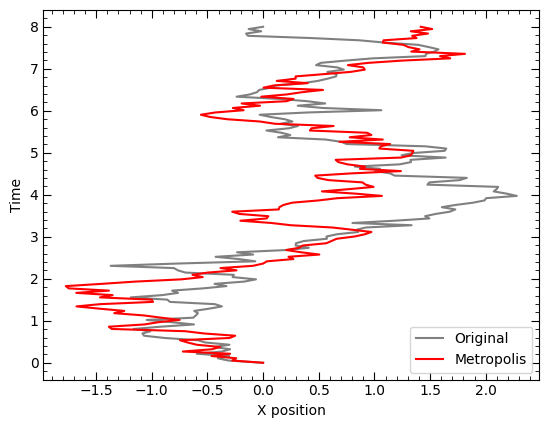

In [5]:
pc_savepath_paths_fig = r"C:\Users\User\Documents\Durham Work\Year 3\CompPhys\Paths.svg"
laptop_savepath_paths_fig = r"C:\Users\sebas\Documents\Durham Work\Year 3\Comp Phys\Paths.svg"
plt.figure(1)

plt.plot(paths_orig[3],times, color = 'grey', label = "Original")
plt.plot(paths_x[3],times, color = 'red',label = "Metropolis")

plt.minorticks_on()
plt.tick_params(which = 'major', length = 6, bottom = True, top = True, left = True, right = True, direction = 'in')
plt.tick_params(which = 'minor', length = 3, bottom = True, top = True, left = True, right = True, direction = 'in')

plt.xlabel('X position')
plt.ylabel('Time')
plt.legend(loc = "lower right")


plt.savefig(laptop_savepath_paths_fig, bbox_inches='tight')

plt.show()

# Action Plot

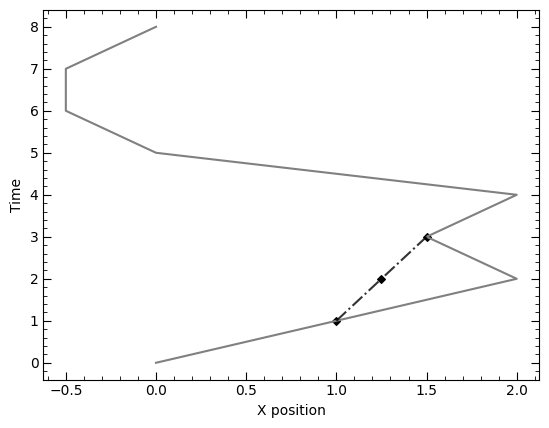

In [29]:
x_position_orig = [0,1,2,1.5,2,0,-0.5,-0.5,0]
x_position_new = [1,1.25,1.5]
time = [0,1,2,3,4,5,6,7,8]
time_change = [1,2,3]

pc_savepath_delta_S = r"C:\Users\User\Documents\Durham Work\Year 3\CompPhys\delta_S.svg"
laptop_savepath_delta_S = r"C:\Users\sebas\Documents\Durham Work\Year 3\Comp Phys\delta_S.svg"
plt.figure(1)

plt.minorticks_on()
plt.tick_params(which = 'major', length = 6, bottom = True, top = True, left = True, right = True, direction = 'in')
plt.tick_params(which = 'minor', length = 3, bottom = True, top = True, left = True, right = True, direction = 'in')

plt.plot(x_position_orig, time, label = "original", color = 'grey')
plt.plot(x_position_new, time_change, linestyle = "-.",label = "Change", color = "black", alpha = 0.8)
plt.scatter(x_position_new, time_change, color = "black", s = 15, marker = "D")

plt.xlabel('X position')
plt.ylabel('Time')

plt.savefig(laptop_savepath_delta_S, bbox_inches='tight')
plt.show()

# Brownian Bridge Plot

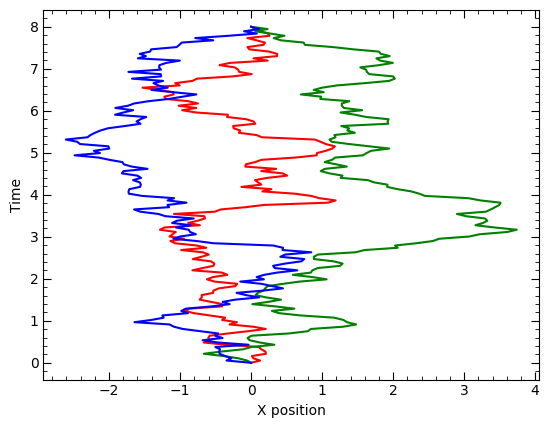

In [30]:
pc_savepath_bridge = r"C:\Users\User\Documents\Durham Work\Year 3\CompPhys\bridge.svg"
laptop_savepath_bridge = r"C:\Users\sebas\Documents\Durham Work\Year 3\Comp Phys\bridge.svg"

colors = ['red', 'green', 'blue']

plt.figure(1)

plt.minorticks_on()
plt.tick_params(which = 'major', length = 6, bottom = True, top = True, left = True, right = True, direction = 'in')
plt.tick_params(which = 'minor', length = 3, bottom = True, top = True, left = True, right = True, direction = 'in')

for i in range (3):
    plt.plot(paths_orig[i+20], times, colors[i])


plt.xlabel('X position')
plt.ylabel('Time')

plt.savefig(laptop_savepath_bridge, bbox_inches='tight')
plt.show()

# Combined Bridge and action plot

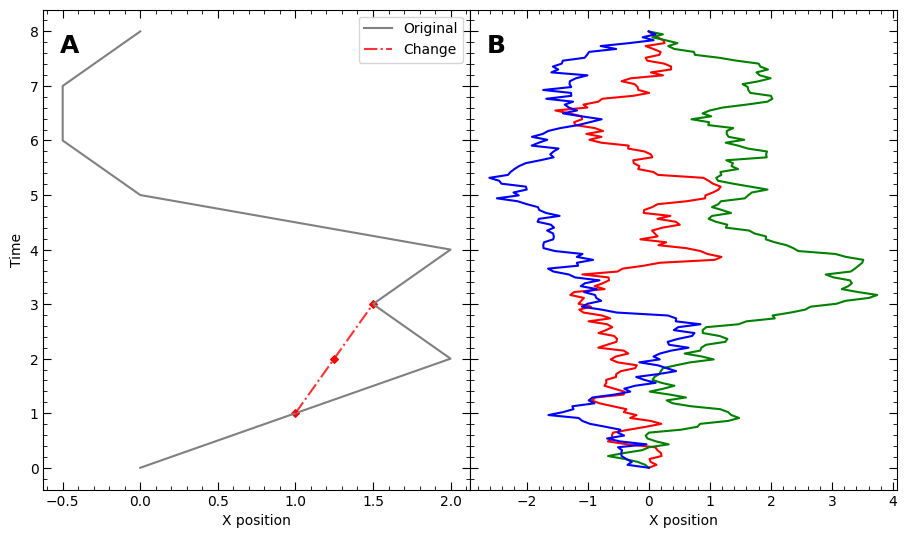

In [49]:
# Combined Plot
pc_savepath_combined = r"C:\Users\User\Documents\Durham Work\Year 3\CompPhys\combined.svg"
laptop_savepath_combined = r"C:\Users\sebas\Documents\Durham Work\Year 3\Comp Phys\combined.svg"

fig = plt.figure(1)

# Bridge Plot
ax1 = fig.add_axes([0,0,2/3,1]) #left bottom width height

ax1.minorticks_on()
ax1.tick_params(which = 'major', length = 6, bottom = True, top = True, left = True, right = True, direction = 'in')
ax1.tick_params(which = 'minor', length = 3, bottom = True, top = True, left = True, right = True, direction = 'in')

ax1.set_ylabel('Time')
ax1.set_xlabel('X position')

ax1.plot(x_position_orig, time, label = "Original", color = 'grey')
ax1.plot(x_position_new, time_change, linestyle = "-.",label = "Change", color = "red", alpha = 0.8)
ax1.scatter(x_position_new, time_change, color = "red", s = 15, marker = "D")
ax1.legend()


ax1.text(
    0.04, 0.95, 'A',
    transform=ax1.transAxes,
    fontsize=18,
    fontweight='bold',
    va='top'
)

#Action Plot
f2 = fig.add_axes([2/3,0,2/3,1])

f2.minorticks_on()
f2.tick_params(which = 'major', length = 6, bottom = True, top = True, left = True, right = True, direction = 'in')
f2.tick_params(which = 'minor', length = 3, bottom = True, top = True, left = True, right = True, direction = 'in')

f2.set_yticklabels([])
f2.set_xlabel('X position')

for i in range(3):
    f2.plot(paths_orig[i+20], times, colors[i])

f2.text(
    1.04, 0.95, 'B',
    transform=ax1.transAxes,
    fontsize=18,
    fontweight='bold',
    va='top'
)

plt.savefig(laptop_savepath_combined, bbox_inches='tight')

plt.show()